In [1]:
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from icecream import ic

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
 # View all of the classes that automap found
 Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
 # Create our session (link) from Python to the DB
 session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns1 = inspector.get_columns('measurement')
print(f'Measurement table has the following columns: ')
for c in columns1:
    print(c['name'], c['type'])
print(f'Measurement table has the following columns: ')
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c['type'])


Measurement table has the following columns: 
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Measurement table has the following columns: 
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
 # Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Measurement table most recent date is {[recent for recent in recent]}.')


Measurement table most recent date is ['2017-08-23'].


ic| len(dates): 2223
ic| len(precip): 2223


<AxesSubplot:title={'center':'Precipitation in Honolulu from 2016-08-24 Through 2017-08-23'}, xlabel='Date', ylabel='Precipitation'>

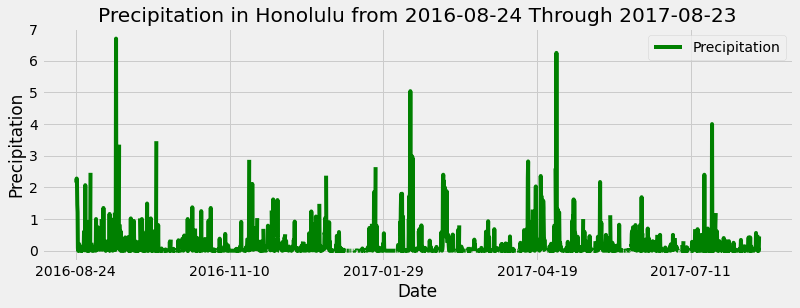

In [70]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(weeks=52)
# ic(query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
# ic(results)
dates = [result[0] for result in results]
ic(len(dates))
precip = [result[1] for result in results]
ic(len(precip))
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(list(zip(dates, precip)))
precip_df.columns = ["Date", "Precipitation"]

precip_df = precip_df.set_index('Date')
# precip_df.head()

# Sort the dataframe by date
precip_sorted = precip_df.sort_values(by=["Date"])
precip_sorted.head(20)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,4))
precip_sorted['Precipitation'].plot(ylabel="Precipitation", title="Precipitation in Honolulu from 2016-08-24 Through 2017-08-23", color='green', legend=True)




In [39]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
 precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
 # Design a query to calculate the total number stations in the dataset

In [ ]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [ ]:
 # Close Session
session.close()